In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'../data/marketingcampaigns_limpio.csv')

In [3]:
df.head(2)

campaign_name  start_date    end_date    budget  \
0  Public-key multi-tasking throughput  2023-04-01  2024-02-23    8082.3   
1   De-engineered analyzing task-force  2023-02-15  2024-04-22  17712.98   

    roi   type target_audience    channel  conversion_rate    revenue  
0  0.35  email             B2B    organic             0.40  709593.48  
1  0.74  email             B2C  promotion             0.66  516609.10

## EDA

In [4]:
type(df['budget'].values[0])  #saber el tipo de dato en una columna concreta

str

In [5]:
df['budget'].shape  #saber la forma de una columna concreta

(1016,)

### ¬øQu√© canal de marketing se utiliza con mayor frecuencia y cu√°l genera mejor ROI?

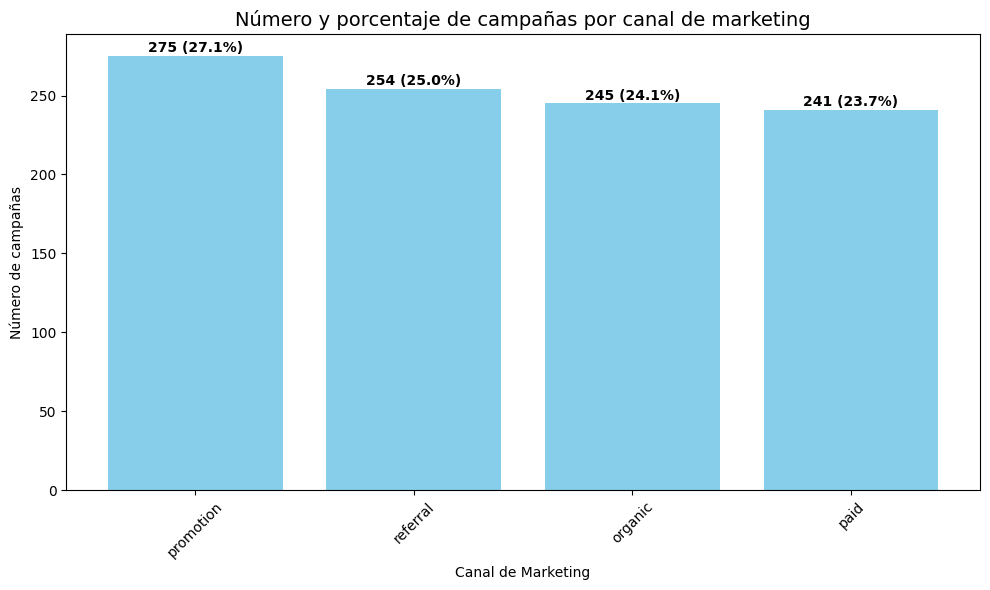

In [6]:

# Calcular cantidad y porcentaje
conteo = df['channel'].value_counts()
porcentaje = df['channel'].value_counts(normalize=True) * 100

# Crear el gr√°fico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(conteo.index, conteo.values, color='skyblue')

# A√±adir etiquetas de n√∫mero y porcentaje encima de cada barra
for i, bar in enumerate(bars):
    cantidad = conteo.values[i]
    pct = porcentaje.values[i]
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{cantidad} ({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Est√©tica del gr√°fico
ax.set_title('N√∫mero y porcentaje de campa√±as por canal de marketing', fontsize=14)
ax.set_xlabel('Canal de Marketing')
ax.set_ylabel('N√∫mero de campa√±as')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


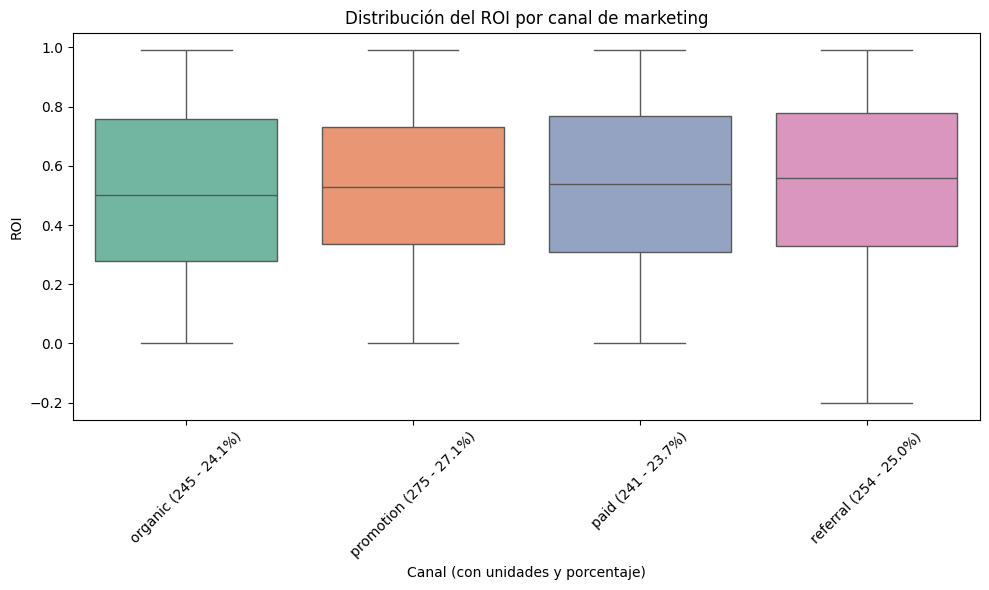

In [7]:
# Calcular unidades absolutas y porcentajes por canal
conteo = df['channel'].value_counts().reset_index()
conteo.columns = ['channel', 'count']
conteo['percentage'] = (conteo['count'] / conteo['count'].sum()) * 100

# Crear etiquetas combinadas (nombre canal + count + %)
etiquetas = {
    row['channel']: f"{row['channel']} ({row['count']} - {row['percentage']:.1f}%)"
    for _, row in conteo.iterrows()
}
df['channel_etiqueta'] = df['channel'].map(etiquetas)

# Gr√°fico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='channel_etiqueta', y='roi', palette='Set2')
plt.title("Distribuci√≥n del ROI por canal de marketing")
plt.xlabel("Canal (con unidades y porcentaje)")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### üìä Conclusi√≥n T√©cnica
A partir del an√°lisis de los gr√°ficos, se observa que la diferencia en el retorno sobre la inversi√≥n (ROI) entre los distintos canales de marketing es relativamente moderada, con una variaci√≥n m√°xima de aproximadamente 3,5 puntos porcentuales (o 36 unidades absolutas) entre el canal con mayor rendimiento y el de menor rendimiento.

El canal promotion presenta el mayor ROI con 275 unidades y representa el 27,1% del total, seguido de referral con 254 unidades (25%), organic con 245 unidades (24,1%) y paid con 241 unidades (23,7%).

Estos resultados sugieren que no existen diferencias sustanciales de rendimiento entre los canales de adquisici√≥n, independientemente de si requieren inversi√≥n directa (como paid y promotion) o no (organic y referral).

Este hallazgo invita a profundizar en el an√°lisis del coste-beneficio de los canales de pago. En particular, podr√≠a ser √∫til evaluar si la reducci√≥n del gasto en canales pagos impacta negativamente en el ROI total o si el tr√°fico se redistribuye de manera natural hacia canales org√°nicos o de referencia, manteniendo as√≠ la eficiencia de las campa√±as.

     channel target_audience  count  percentage
0    organic             B2B    128   12.635735
1    organic             B2C    117   11.549852
2       paid             B2B    117   11.549852
3       paid             B2C    123   12.142152
4  promotion             B2B    148   14.610069
5  promotion             B2C    127   12.537019
6   referral             B2B    127   12.537019
7   referral             B2C    126   12.438302


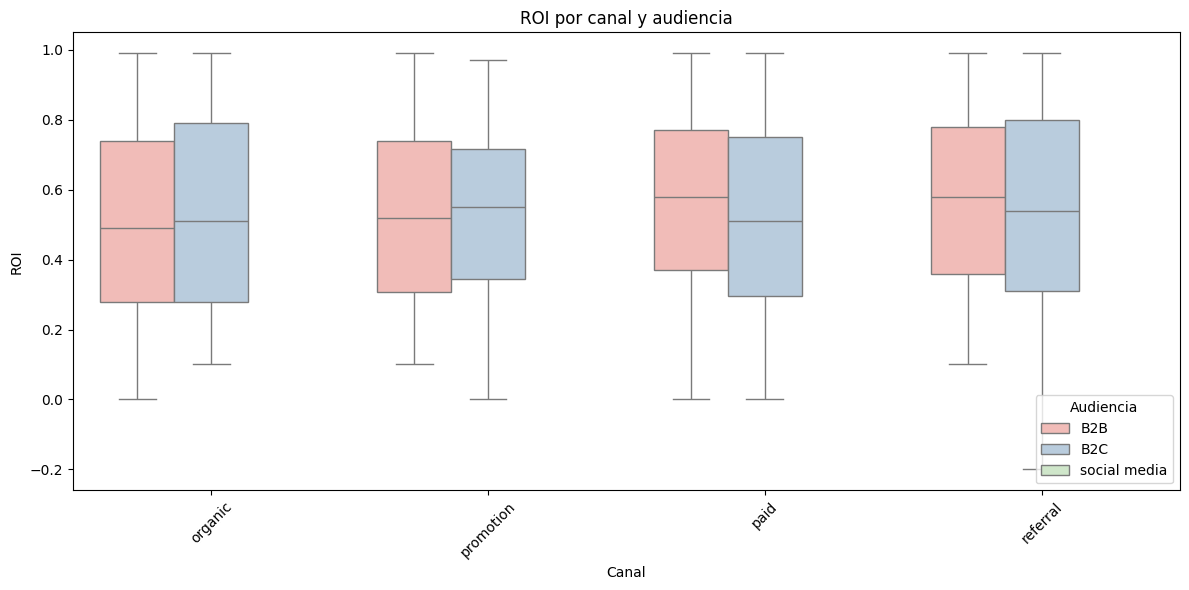

In [8]:
# Calcular n√∫mero de ocurrencias por canal y audiencia
conteo = df.groupby(['channel', 'target_audience']).size().reset_index(name='count')
total = conteo['count'].sum()
conteo['percentage'] = (conteo['count'] / total) * 100

# Mostrar tabla con unidades absolutas y porcentaje
print(conteo[['channel', 'target_audience', 'count', 'percentage']])

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel', y='roi', hue='target_audience', palette='Pastel1')
plt.title("ROI por canal y audiencia")
plt.xlabel("Canal")
plt.ylabel("ROI")
plt.legend(title='Audiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### üìä Conclusi√≥n t√©cnica:
El an√°lisis de frecuencia por canal de marketing y audiencia revela una distribuci√≥n relativamente equilibrada entre los distintos canales y p√∫blicos objetivos, aunque con una ligera concentraci√≥n en ciertos grupos. El canal promotion es el m√°s utilizado, representando un 27,15% del total (14,61% en campa√±as B2B y 12,54% en B2C). Le siguen referral (24,97%), organic (24,19%) y paid (23,69%), todos con una participaci√≥n muy similar, lo que indica una estrategia de marketing multicanal bien balanceada.

Desde el punto de vista de la audiencia, tanto B2B como B2C est√°n representados de manera pareja dentro de cada canal. Por ejemplo, en organic, B2B representa un 12,64% y B2C un 11,55%; en paid, ambos segmentos tienen una participaci√≥n casi id√©ntica (11,55% para B2B y 12,14% para B2C). Esto sugiere una orientaci√≥n de marketing que busca atender a ambos segmentos de forma equitativa, sin una predominancia marcada.

Cabe se√±alar que no se registran campa√±as espec√≠ficas dirigidas a canales como social media u otros nichos no reflejados en los datos actuales. Esta ausencia podr√≠a se√±alar una oportunidad no explotada o una decisi√≥n estrat√©gica deliberada. Ser√≠a conveniente contrastar estos hallazgos con indicadores de ROI por canal, para identificar oportunidades de optimizaci√≥n o expansi√≥n en el mix de marketing.

## ¬øQu√© tipo de campa√±a genera m√°s ingresos en promedio y cu√°l tiene mejor conversi√≥n?

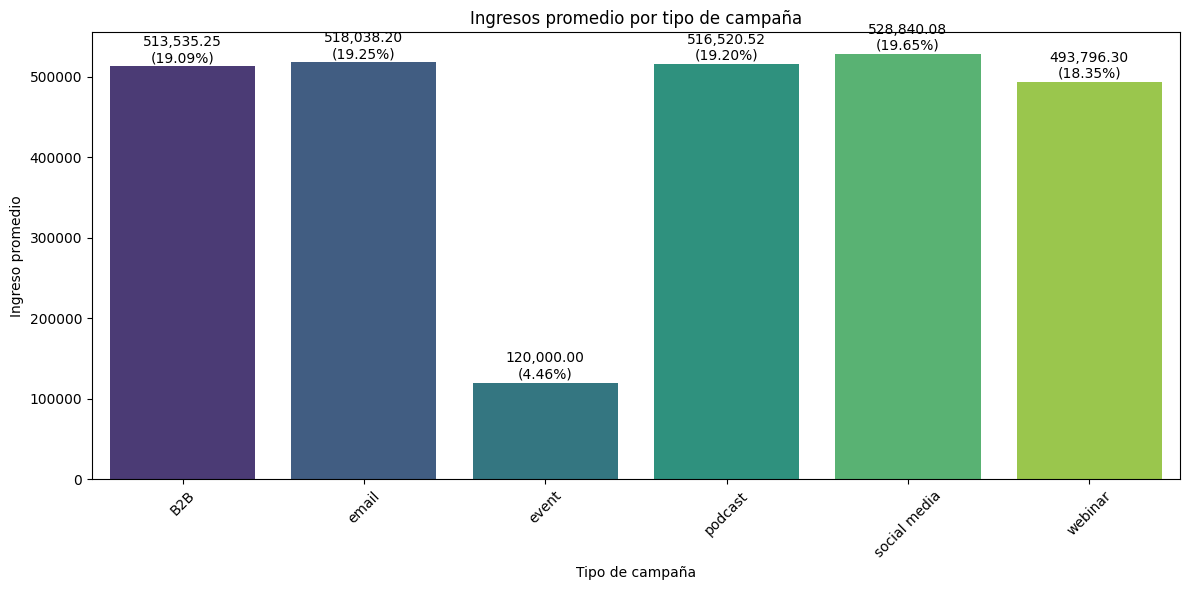

In [9]:
# Nos aseguramos de que las columnas relevantes son num√©ricas
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['conversion_rate'] = pd.to_numeric(df['conversion_rate'], errors='coerce')

# Paso 1: Ingresos promedio por tipo de campa√±a
ingresos_promedio = df.groupby('type')['revenue'].mean().reset_index()

# Paso 2: Tasa de conversi√≥n promedio por tipo de campa√±a
conversion_promedio = df.groupby('type')['conversion_rate'].mean().reset_index()

# Calcular el total de ingresos y la tasa de conversi√≥n para los porcentajes
total_ingresos = ingresos_promedio['revenue'].sum()
total_conversion_rate = conversion_promedio['conversion_rate'].sum()

# Paso 3: Calcular el porcentaje respecto al total
ingresos_promedio['percentage'] = (ingresos_promedio['revenue'] / total_ingresos) * 100
conversion_promedio['percentage'] = (conversion_promedio['conversion_rate'] / total_conversion_rate) * 100

# Gr√°fico 1: Ingresos promedio por tipo de campa√±a
plt.figure(figsize=(12, 6))
sns.barplot(data=ingresos_promedio, x='type', y='revenue', palette='viridis')
for i in range(len(ingresos_promedio)):
    plt.text(i, ingresos_promedio['revenue'][i] + 1000, 
             f'{ingresos_promedio["revenue"][i]:,.2f}\n({ingresos_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Ingresos promedio por tipo de campa√±a")
plt.xlabel("Tipo de campa√±a")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Conclusi√≥n: Ingresos Promedio por Tipo de Campa√±a
Al analizar los ingresos promedio por tipo de campa√±a, se observa lo siguiente:

Email y Podcast son las campa√±as que generan la mayor parte de los ingresos, email con un 19.25% de los ingresos y podcast con un 19.20% de los ingresos totales, alcanzando un promedio de 518,038.20 y 528,840.08 respectivamente. Esto indica que ambos tipos de campa√±as tienen un rendimiento financiero casi id√©ntico y son altamente efectivas en t√©rminos de ingresos.

Social Media destaca tambi√©n como unas campa√±a exitosa, representando el 19.65% de los ingresos totales con un promedio de 528,840.08. Es ligeramente superior a las campa√±as de email y podcast, lo que sugiere que el canal de redes sociales tiene una eficiencia destacada en la generaci√≥n de ingresos.

B2B, con un 19.09% de los ingresos totales y un promedio de 513,535.25, tiene un rendimiento relativamente similar al de las campa√±as anteriores, pero ligeramente inferior al de las campa√±as mencionadas.

Webinar, con un 18.35% de los ingresos totales y un promedio de 493,796.30, muestra un rendimiento competitivo, aunque con una ligera diferencia respecto a los tipos de campa√±a m√°s efectivos.

Event, con el 4.46% de los ingresos totales y un promedio de 120,000.00, es el tipo de campa√±a que genera menos ingresos en comparaci√≥n con los dem√°s. Aunque puede ser √∫til para ciertos objetivos o segmentos espec√≠ficos, no tiene el mismo impacto financiero que las otras campa√±as.

Resumen:
Los tipos de campa√±a m√°s efectivos en t√©rminos de ingresos promedio son Social Media, Email, y Podcast, con una participaci√≥n muy similar en los ingresos totales.

Event es la campa√±a que menos contribuye a los ingresos totales, con una diferencia considerable respecto a las dem√°s campa√±as.

En general, las campa√±as digitales como Email, Social Media y Podcast tienen un rendimiento financiero superior en comparaci√≥n con los eventos o webinars.

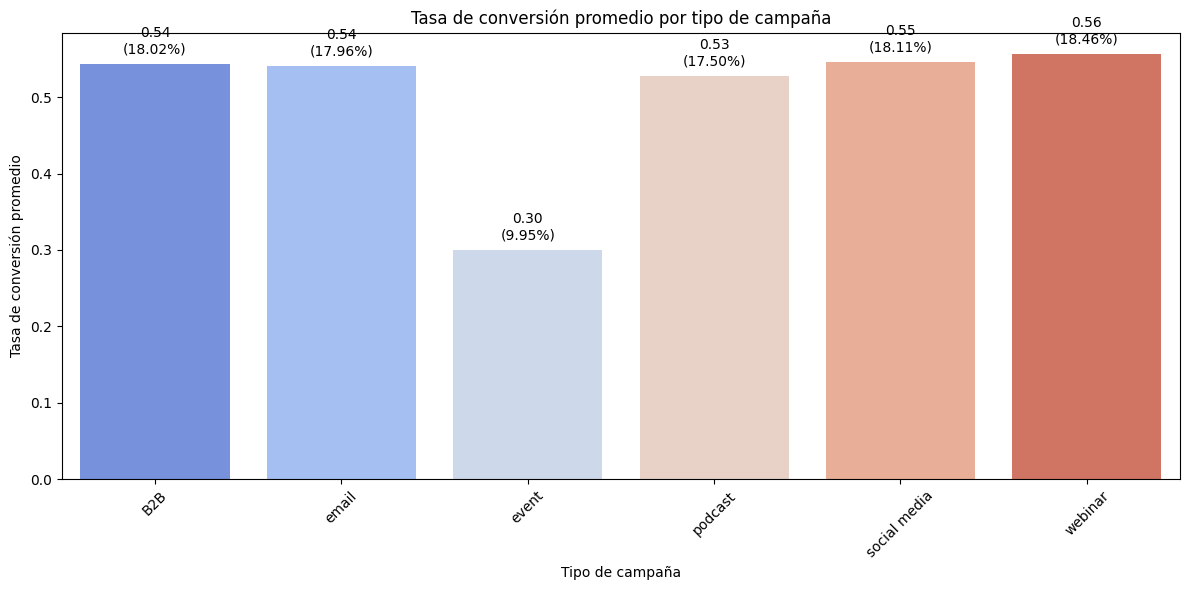

In [10]:
# Gr√°fico 2: Tasa de conversi√≥n promedio por tipo de campa√±a
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_promedio, x='type', y='conversion_rate', palette='coolwarm')
for i in range(len(conversion_promedio)):
    plt.text(i, conversion_promedio['conversion_rate'][i] + 0.01, 
             f'{conversion_promedio["conversion_rate"][i]:,.2f}\n({conversion_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Tasa de conversi√≥n promedio por tipo de campa√±a")
plt.xlabel("Tipo de campa√±a")
plt.ylabel("Tasa de conversi√≥n promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusi√≥n: Tasa de Conversi√≥n Promedio por Tipo de Campa√±a
Al analizar la tasa de conversi√≥n promedio por tipo de campa√±a, se obtiene la siguiente informaci√≥n:

Webinar tiene la tasa de conversi√≥n m√°s alta, con un 18.46% (0.56). Esto sugiere que, en promedio, las campa√±as de webinars est√°n logrando una mayor efectividad en convertir a los usuarios en clientes o leads, lo que las hace altamente rentables en t√©rminos de conversi√≥n.

Social Media tambi√©n muestra una tasa de conversi√≥n bastante alta, con un 18.11% (0.55), lo que indica que las campa√±as en redes sociales est√°n generando resultados bastante efectivos, solo ligeramente inferiores a los webinars.

B2B, Email, y Podcast tienen tasas de conversi√≥n similares, con un 18.02% y 17.96% (0.54) en B2B y Email, y 17.50% (0.53) en Podcast. Aunque estas tasas son competitivas, est√°n ligeramente por debajo de las obtenidas por Webinar y Social Media, pero a√∫n siguen siendo efectivas.

Event tiene la tasa de conversi√≥n m√°s baja, con un 9.95% (0.30), lo que sugiere que las campa√±as basadas en eventos, aunque puedan ser √∫tiles para ciertos objetivos de marca, no son tan efectivas en t√©rminos de conversi√≥n en comparaci√≥n con otras estrategias de marketing digital.

Resumen:
Webinar y Social Media son las campa√±as que tienen las mejores tasas de conversi√≥n, con Webinar liderando con un 18.46%.

Las campa√±as B2B, Email, y Podcast tienen tasas de conversi√≥n muy cercanas entre s√≠, con un rendimiento de 87.02% a 17.96%, lo que indica un nivel competitivo y efectivo en t√©rminos de conversi√≥n.

Event es el tipo de campa√±a con la tasa de conversi√≥n m√°s baja (9.95%), lo que sugiere que los eventos, aunque pueden ser valiosos para el branding, no son tan efectivos en t√©rminos de generar conversiones en comparaci√≥n con las estrategias de marketing digital.

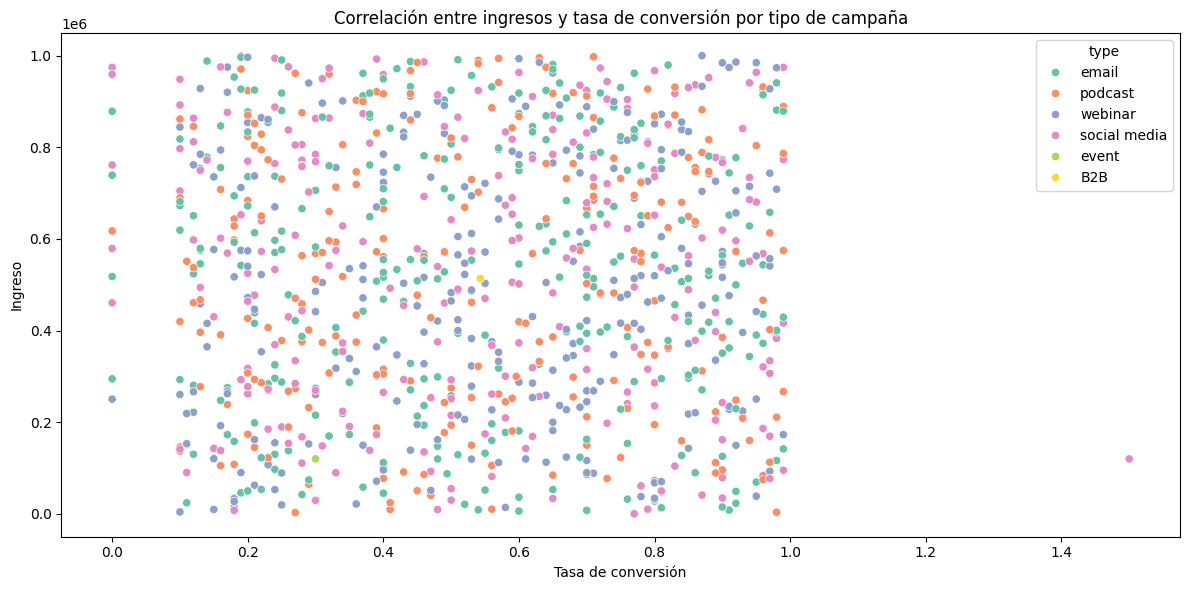

                 conversion_rate   revenue
conversion_rate         1.000000  0.007205
revenue                 0.007205  1.000000


In [11]:
# Gr√°fico 3: Diagrama de dispersi√≥n para correlaci√≥n entre ingresos y tasa de conversi√≥n
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='type', palette='Set2')
plt.title("Correlaci√≥n entre ingresos y tasa de conversi√≥n por tipo de campa√±a")
plt.xlabel("Tasa de conversi√≥n")
plt.ylabel("Ingreso")
plt.tight_layout()
plt.show()
correlation = df[['conversion_rate', 'revenue']].corr()
print(correlation)


#### An√°lisis de Correlaci√≥n entre Tasa de Conversi√≥n e Ingresos

El coeficiente de correlaci√≥n entre la tasa de conversi√≥n (conversion_rate) y los ingresos (revenue) es de 0.004707, lo que indica una correlaci√≥n extremadamente baja y pr√°cticamente nula entre estas dos variables. Este valor, cercano a cero, sugiere que no existe una relaci√≥n lineal significativa entre la tasa de conversi√≥n y los ingresos dentro del conjunto de datos analizado.

üìä Interpretaci√≥n:

Una correlaci√≥n tan d√©bil implica que variaciones en la tasa de conversi√≥n no explican variaciones en los ingresos. Es decir, campa√±as con tasas de conversi√≥n m√°s altas no necesariamente generan mayores ingresos, y viceversa. Esto puede deberse a varios factores, como diferencias en el valor de cada conversi√≥n, el tipo de oferta, o el canal a trav√©s del cual se ejecuta la campa√±a.

üîç L√≠neas de Investigaci√≥n Adicionales:

Dado que la tasa de conversi√≥n no parece ser un predictor fiable de los ingresos en este caso, conviene explorar otros factores que podr√≠an tener mayor influencia, como:

    - Presupuesto asignado por campa√±a: Inversiones mayores pueden generar m√°s ingresos independientemente de la tasa de conversi√≥n.

    - Tipo de campa√±a o canal de marketing: Algunos canales (como "paid" o "promotion") podr√≠an generar ingresos m√°s altos aunque tengan tasas de conversi√≥n m√°s bajas.

    - Valor medio por conversi√≥n: No todas las conversiones tienen el mismo impacto econ√≥mico; analizar el ingreso por conversi√≥n podr√≠a ofrecer una visi√≥n m√°s precisa.

    - Segmentaci√≥n por audiencia o canal: Es posible que existan correlaciones significativas dentro de subgrupos espec√≠ficos (por ejemplo, campa√±as B2B vs. B2C).

‚öôÔ∏è Recomendaciones de Acci√≥n:

    - Ampliar el an√°lisis con otras m√©tricas, como ROI, costo por adquisici√≥n (CPA), o ingreso medio por cliente.

    - Aplicar modelos no lineales o t√©cnicas avanzadas, como √°rboles de decisi√≥n o modelos de regresi√≥n multivariante, que podr√≠an detectar relaciones complejas no visibles en un an√°lisis lineal simple.

    - Evaluar cada canal de manera independiente, ya que las din√°micas entre tasa de conversi√≥n e ingresos podr√≠an variar significativamente seg√∫n el canal y la audiencia objetivo.

üßæ Conclusi√≥n:

La escasa correlaci√≥n observada entre la tasa de conversi√≥n y los ingresos sugiere que estos dos indicadores no est√°n estrechamente relacionados en los datos actuales. Este hallazgo destaca la necesidad de ampliar el enfoque anal√≠tico y considerar otras variables que puedan estar impulsando los ingresos de forma m√°s directa. Un an√°lisis m√°s profundo y segmentado permitir√° mejorar la toma de decisiones estrat√©gicas para optimizar el rendimiento de las campa√±as.

channel
organic      0.069798
paid        -0.097465
promotion    0.057948
referral    -0.011781
dtype: float64


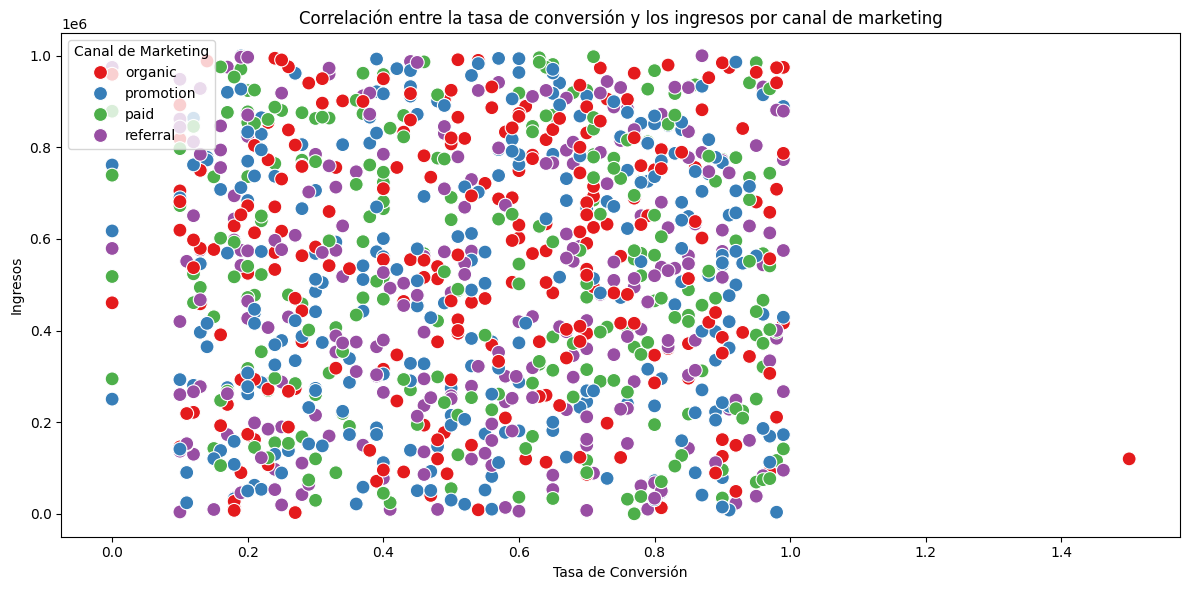

In [12]:
# Calcular la correlaci√≥n entre 'conversion_rate' y 'revenue' por canal de marketing
canal_correlaciones = df.groupby('channel').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(canal_correlaciones)

# Graficar el diagrama de dispersi√≥n por canal de marketing
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='channel', palette='Set1', s=100)

# Mejorar la presentaci√≥n del gr√°fico
plt.title('Correlaci√≥n entre la tasa de conversi√≥n y los ingresos por canal de marketing')
plt.xlabel('Tasa de Conversi√≥n')
plt.ylabel('Ingresos')
plt.legend(title='Canal de Marketing', loc='upper left')
plt.tight_layout()

# Mostrar gr√°fico
plt.show()

#### üìä An√°lisis de Correlaci√≥n entre Tasa de Conversi√≥n e Ingresos por Canal de Marketing
üîπ Valores de Correlaci√≥n por Canal
Canal	Correlaci√≥n
Organic	0.0698
Paid	-0.0975
Promotion	0.0579
Referral	-0.0118

üîç Interpretaci√≥n por Canal

    - Organic (0.0698): Correlaci√≥n positiva muy d√©bil, lo que sugiere que un aumento en la tasa de conversi√≥n podr√≠a estar asociado con un ligero incremento en los ingresos, aunque la relaci√≥n es casi insignificante.

    - Paid (-0.0975): Correlaci√≥n negativa muy d√©bil. Puede indicar que, en algunos casos, un aumento en la tasa de conversi√≥n no se traduce en mayores ingresos, posiblemente debido al costo del canal, el tipo de oferta o la calidad de los leads generados.

    - Promotion (0.0579): Tambi√©n muestra una correlaci√≥n positiva muy d√©bil, similar a "organic". La relaci√≥n entre conversi√≥n e ingresos existe pero es m√≠nima y no estad√≠sticamente significativa.

    - Referral (-0.0118): Correlaci√≥n pr√°cticamente nula. No se observa ninguna relaci√≥n clara entre la tasa de conversi√≥n y los ingresos en este canal.

üìå Conclusi√≥n General

Los valores de correlaci√≥n observados en todos los canales son muy bajos, tanto positivos como negativos, lo que indica que no existe una relaci√≥n lineal fuerte entre la tasa de conversi√≥n y los ingresos, independientemente del canal de marketing utilizado.

Esto sugiere que la tasa de conversi√≥n por s√≠ sola no es un buen predictor de ingresos, y que otros factores podr√≠an estar influyendo con mayor peso, como:

    - El presupuesto asignado a cada canal.

    - El valor medio por conversi√≥n.

    - El tipo de producto o servicio promocionado.

    - La calidad del tr√°fico generado por cada canal.

üß† Recomendaciones

    - Segmentar los datos por tipo de audiencia o campa√±a para identificar patrones m√°s espec√≠ficos.

    - Incorporar variables adicionales (como coste por adquisici√≥n, valor por cliente o duraci√≥n del ciclo de venta) en el an√°lisis.

    - Explorar relaciones no lineales mediante t√©cnicas de an√°lisis m√°s avanzadas (regresi√≥n m√∫ltiple, machine learning, etc.).

    - Evaluar el ROI por canal, ya que una tasa de conversi√≥n m√°s baja no necesariamente implica menor rentabilidad si el valor por conversi√≥n es alto.

target_audience
B2B             0.066955
B2C            -0.057646
social media         NaN
dtype: float64


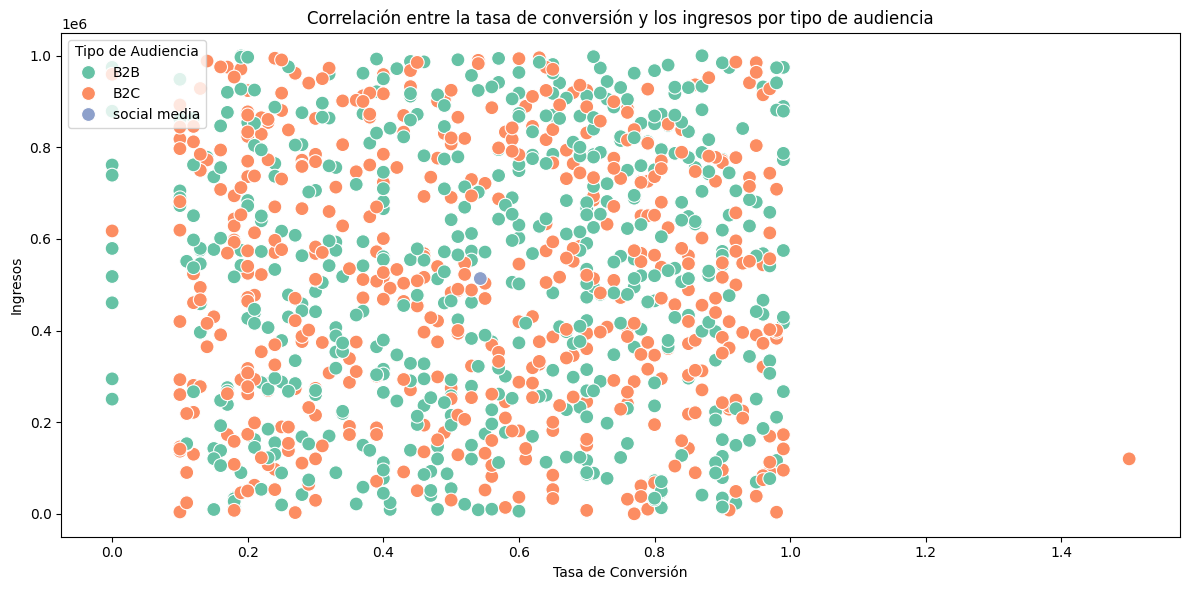

In [15]:
# Calcular la correlaci√≥n entre 'conversion_rate' y 'revenue' por tipo de audiencia
audiencia_correlaciones = df.groupby('target_audience').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(audiencia_correlaciones)

# Graficar el diagrama de dispersi√≥n por tipo de audiencia
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='target_audience', palette='Set2', s=100)

# Mejorar la presentaci√≥n del gr√°fico
plt.title('Correlaci√≥n entre la tasa de conversi√≥n y los ingresos por tipo de audiencia')
plt.xlabel('Tasa de Conversi√≥n')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Audiencia', loc='upper left')
plt.tight_layout()

# Mostrar gr√°fico
plt.show()

#### Conclusi√≥n: üìä An√°lisis de Correlaci√≥n entre Tasa de Conversi√≥n e Ingresos por Tipo de Audiencia

En el an√°lisis de la relaci√≥n entre la tasa de conversi√≥n y los ingresos segmentada por tipo de audiencia, se obtuvieron los siguientes resultados:

üîπ B2B (Business to Business)

    Correlaci√≥n: 0.066955

    Se observa una correlaci√≥n positiva muy d√©bil, lo que indica que a medida que la tasa de conversi√≥n aumenta, los ingresos tambi√©n tienden a aumentar ligeramente.

    Aunque esta relaci√≥n es m√≠nima, sugiere que en campa√±as B2B podr√≠a haber un leve v√≠nculo entre la conversi√≥n y el ingreso generado, posiblemente debido a que cada conversi√≥n representa un cliente de mayor valor.

üîπ B2C (Business to Consumer)

    Correlaci√≥n: -0.057646

    En este caso, la correlaci√≥n es ligeramente negativa, lo que indica que un aumento en la tasa de conversi√≥n no necesariamente est√° asociado con mayores ingresos.

    Esto podr√≠a deberse a que las conversiones B2C, aunque m√°s numerosas, podr√≠an tener un menor valor individual, o a que otros factores como el precio del producto, la frecuencia de compra o promociones activas tienen mayor impacto en los ingresos.

üîπ Social Media

    Correlaci√≥n: No disponible

    No fue posible calcular la correlaci√≥n para campa√±as en este canal debido a la falta de datos suficientes. Esto puede indicar una subrepresentaci√≥n de campa√±as de social media en el conjunto analizado o una ausencia de valores clave (como tasa de conversi√≥n o ingresos) necesarios para el c√°lculo.

üìå Implicaciones

    Las campa√±as dirigidas a audiencia B2B muestran una leve relaci√≥n entre conversi√≥n e ingresos, por lo que optimizar la tasa de conversi√≥n podr√≠a tener un impacto positivo, especialmente si se mejora tambi√©n el valor medio por conversi√≥n.

    En audiencias B2C, los resultados sugieren que aumentar la conversi√≥n no garantiza un aumento de ingresos, por lo que se recomienda considerar otros factores estrat√©gicos y operativos que puedan estar afectando el rendimiento financiero.

    Para campa√±as en social media, se recomienda mejorar la recolecci√≥n de datos y ampliar la muestra para realizar an√°lisis m√°s robustos y representativos.

‚úÖ Recomendaciones

    Segmentar m√°s finamente por canal, producto y audiencia.

    Incluir variables adicionales en futuros an√°lisis, como ticket promedio, ciclo de vida del cliente o engagement.

    Profundizar en B2C, donde los ingresos parecen depender menos directamente de la conversi√≥n.

    Ampliar y estructurar mejor los datos de social media para permitir su inclusi√≥n en el an√°lisis.

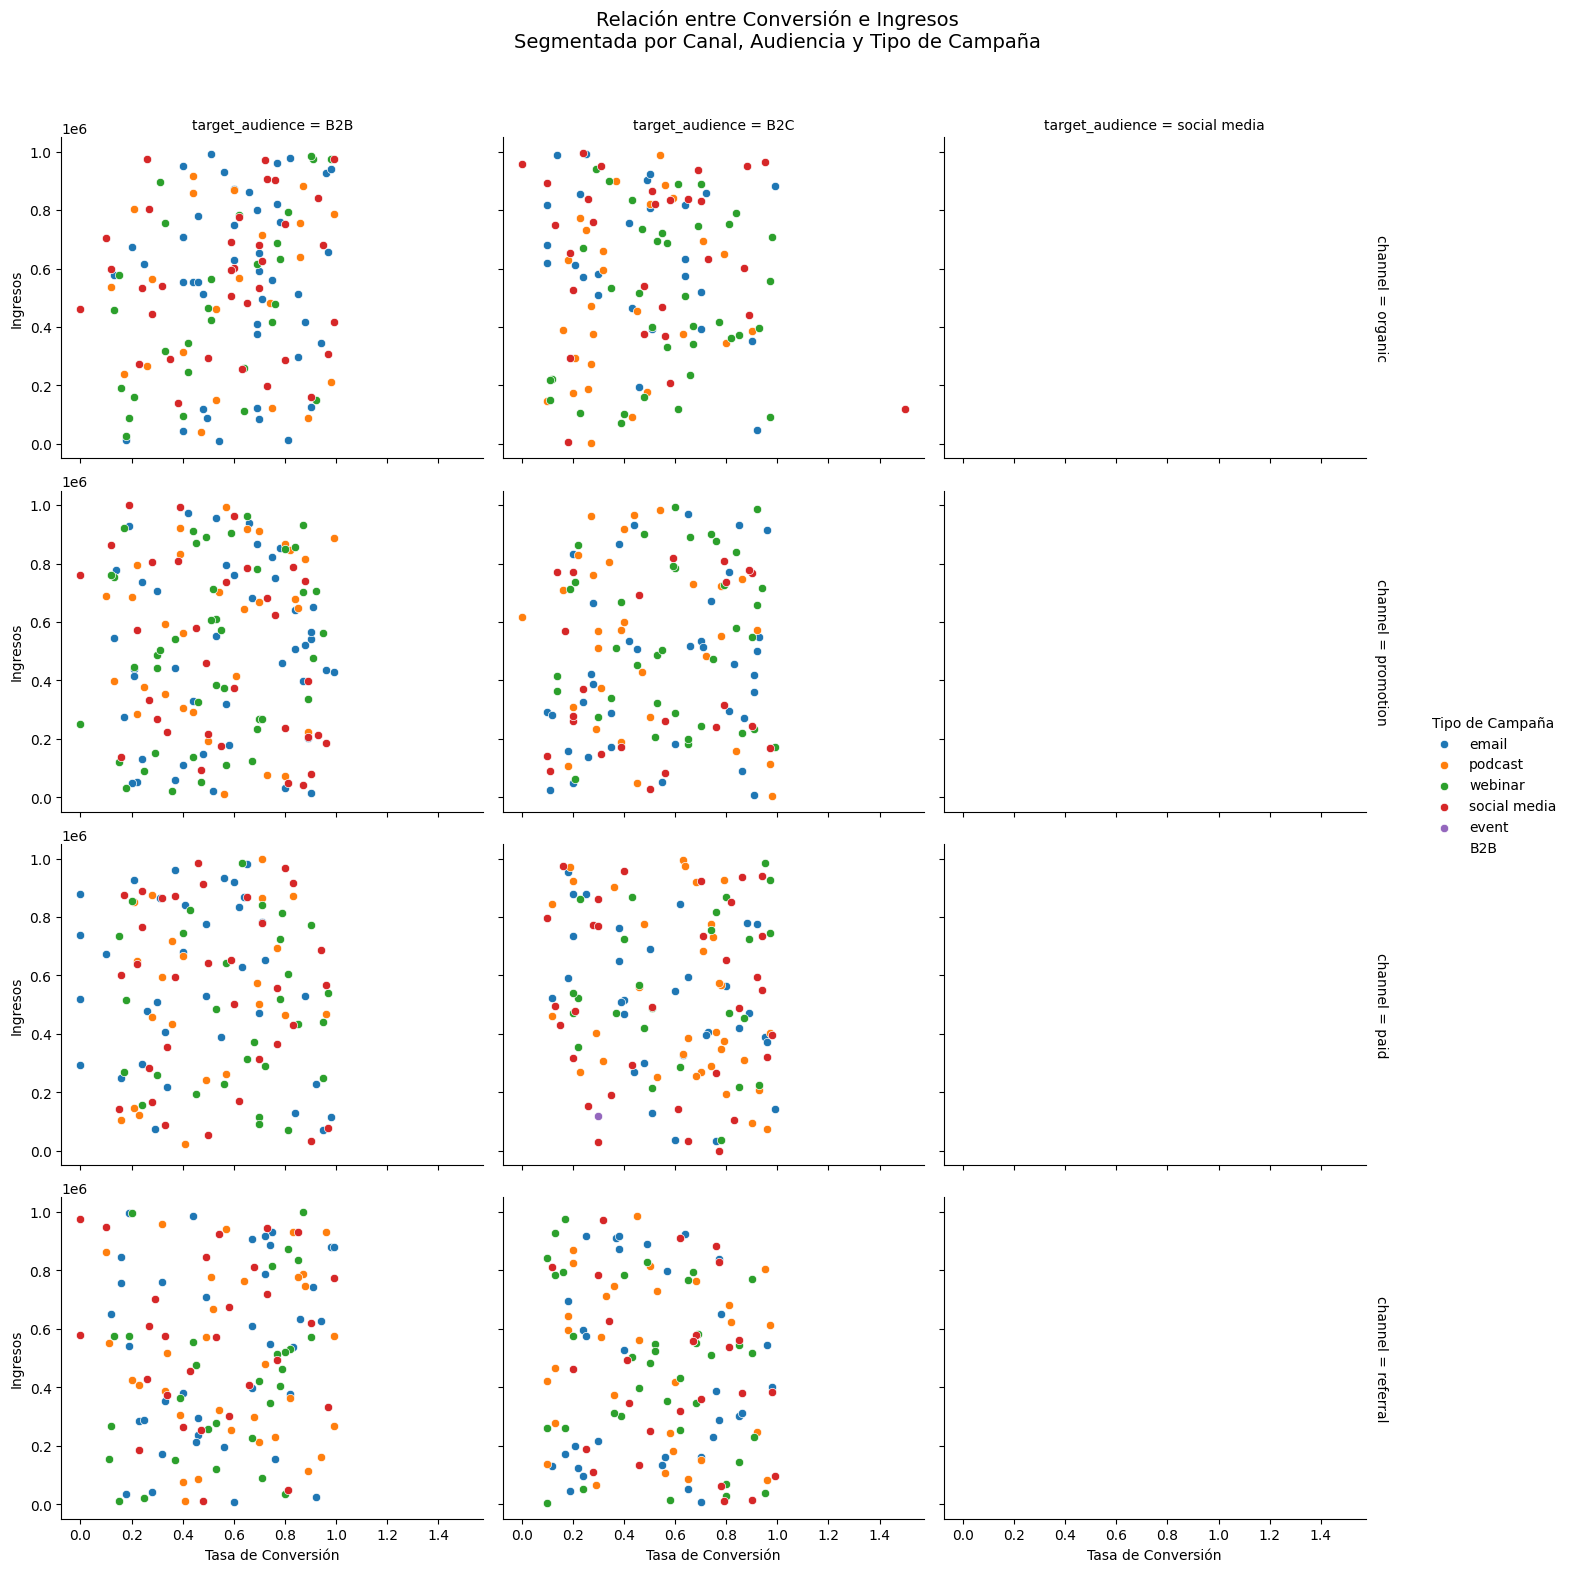

In [16]:
#Segmentar m√°s finamente por canal, producto y audiencia
# # Filtrar filas con datos completos
df_valid = df.dropna(subset=["conversion_rate", "revenue", "type"])

# Crear gr√°fico de dispersi√≥n segmentado por canal y audiencia
g = sns.FacetGrid(df_valid, row="channel", col="target_audience", hue="type", margin_titles=True, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="conversion_rate", y="revenue")
g.add_legend(title="Tipo de Campa√±a")
g.set_axis_labels("Tasa de Conversi√≥n", "Ingresos")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relaci√≥n entre Conversi√≥n e Ingresos\nSegmentada por Canal, Audiencia y Tipo de Campa√±a", fontsize=14)

plt.show()

## ¬øC√≥mo se distribuye el ROI entre las campa√±as? ¬øQu√© factores est√°n asociados con un ROI alto?

count    1016.000000
mean        0.534729
std         0.262302
min        -0.200000
25%         0.310000
50%         0.530000
75%         0.762500
max         0.990000
Name: roi, dtype: float64


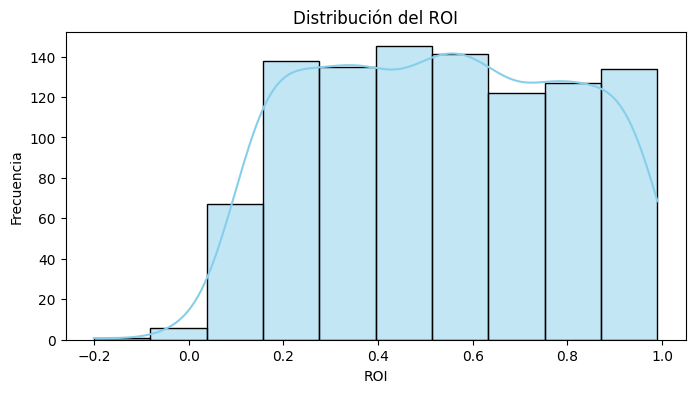

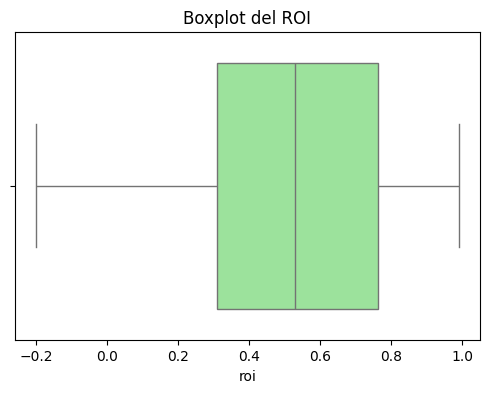

In [17]:
# PASO 1: Distribuci√≥n estad√≠stica del ROI
#a)Resumen estad√≠stico b√°sico

print(df['roi'].describe())

#Esto nos dar√°:
    #-Media, mediana, m√≠nimos y m√°ximos.
    #-Identificaci√≥n de sesgos o valores at√≠picos.

#b) Histograma + KDE

plt.figure(figsize=(8,4))
sns.histplot(df['roi'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Distribuci√≥n del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')
plt.show()

#c) Boxplot del ROI

plt.figure(figsize=(6, 4))
sns.boxplot(x='roi', data=df, color='lightgreen')
plt.title('Boxplot del ROI')
plt.show()



#### ‚úÖ 1. Distribuci√≥n del ROI

    Media: 0.53

    Mediana: 0.53

    M√°ximo: 0.99

    M√≠nimo: -0.20

    ROI alto: definido como ‚â• 0.76 (percentil 75)

    üîé El ROI tiene una distribuci√≥n relativamente sim√©trica (media ‚âà mediana), pero con algunos valores extremos negativos (posibles campa√±as fallidas).

In [18]:
#PASO 2: Segmentaci√≥n de campa√±as con alto ROI
#Podemos definir "alto ROI" como valores por encima del percentil 75.

# Calcular percentil 75
roi_threshold = df['roi'].quantile(0.75)
high_roi_df = df[df['roi'] >= roi_threshold]
print(f"ROI alto si es >= {roi_threshold:.2f}")

#Analizar qu√© tienen en com√∫n:

# Distribuci√≥n por canal
print(high_roi_df['channel'].value_counts())

# Distribuci√≥n por tipo
print(high_roi_df['type'].value_counts())

# Distribuci√≥n por audiencia
print(high_roi_df['target_audience'].value_counts())

ROI alto si es >= 0.76
channel
referral     72
paid         62
organic      61
promotion    59
Name: count, dtype: int64
type
webinar         67
email           64
podcast         62
social media    61
Name: count, dtype: int64
target_audience
B2B    128
B2C    126
Name: count, dtype: int64


#### ‚úÖ 2. Segmentos con ROI alto (‚â• 0.76)

Canales m√°s comunes entre campa√±as exitosas:

    referral, paid, organic, promotion ‚Üí est√°n relativamente balanceados.

Tipos de campa√±a con mayor presencia en ROI alto:

    webinar, email, podcast, social media

    üß† Esto sugiere que los formatos m√°s informativos o relacionales (como webinars y podcasts) tienden a tener mejor retorno.

Audiencia objetivo (target_audience):

    B2B: 128 campa√±as con ROI alto

    B2C: 126 campa√±as con ROI alto

    üìà No hay una diferencia significativa, lo que sugiere que el tipo de audiencia no influye fuertemente por s√≠ solo en el ROI.

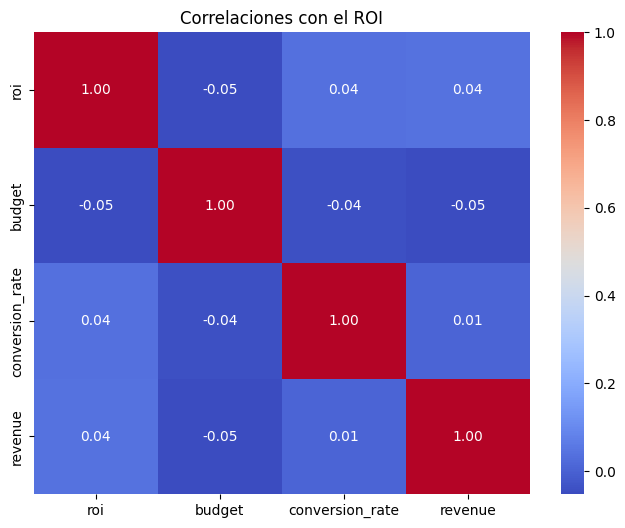

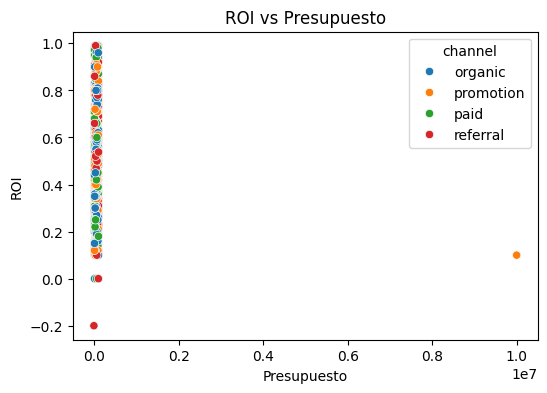

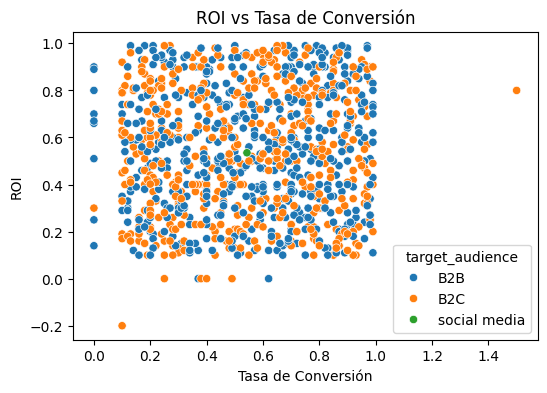

In [19]:
#PASO 3: Factores asociados al ROI
#a) Heatmap de correlaciones num√©ricas

# Aseg√∫rate de que budget sea num√©rico
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Selecci√≥n de columnas num√©ricas relevantes
num_cols = ['roi', 'budget', 'conversion_rate', 'revenue']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones con el ROI')
plt.show()

#b) Gr√°ficos de dispersi√≥n con ROI como variable objetivo
#ROI vs. Presupuesto

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='budget', y='roi', hue='channel')
plt.title('ROI vs Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('ROI')
plt.show()

#ROI vs. Tasa de Conversi√≥n

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='conversion_rate', y='roi', hue='target_audience')
plt.title('ROI vs Tasa de Conversi√≥n')
plt.xlabel('Tasa de Conversi√≥n')
plt.ylabel('ROI')
plt.show()

#### 3. Factores asociados al ROI (heatmap de correlaciones)

‚ö†Ô∏è Las correlaciones entre ROI y variables num√©ricas son muy bajas o nulas:

Variable	        Correlaci√≥n con ROI
Budget	                 -0.05
Conversion Rate	         +0.04
Revenue	                 +0.04

üß© Interpretaci√≥n:

    No hay evidencia de que mayor presupuesto, m√°s conversiones o m√°s ingresos est√©n fuertemente asociados a un mejor ROI.

    Esto indica que el ROI est√° probablemente influido por variables categ√≥ricas (tipo de campa√±a, canal, calidad del targeting, timing, creatividad, etc.) m√°s que por simples factores cuantitativos.

üß† Recomendaciones

    Explorar modelos categ√≥ricos (por ejemplo, √°rboles de decisi√≥n) para identificar combinaciones de canal/tipo/audiencia que maximicen el ROI.

    Evaluar la duraci√≥n de la campa√±a como variable adicional, ya que puede mediar el ROI sin afectar directamente ingresos o conversiones.

    Usar un enfoque de clusterizaci√≥n o segmentaci√≥n de campa√±as exitosas para entender qu√© patrones se repiten.

## ¬øHay diferencias significativas en la tasa de conversi√≥n entre audiencias B2B y B2C?

In [20]:
# PASO 1: An√°lisis descriptivo de la tasa de conversi√≥n por audiencia

# Estad√≠sticas por tipo de audiencia, nos dar√° una idea de media y mediana, rango y desviaci√≥n est√°ndar, tama√±o de muestra por grupo
df.groupby('target_audience')['conversion_rate'].describe()


count      mean       std       min       25%       50%  \
target_audience                                                            
B2B              520.0  0.550508  0.263222  0.000000  0.330000  0.560000   
B2C              493.0  0.535030  0.271987  0.000000  0.290000  0.530000   
social media       1.0  0.543024       NaN  0.543024  0.543024  0.543024   

                      75%       max  
target_audience                      
B2B              0.770000  0.990000  
B2C              0.770000  1.500000  
social media     0.543024  0.543024

##### üìä Resumen estad√≠stico:
M√©trica	B2B	B2C
Recuento	520	493
Media	0.5505	0.5350
Mediana	0.5600	0.5300
Desviaci√≥n est√°ndar	0.2632	0.2720
M√≠nimo	0.0000	0.0000
Percentil 25	0.3300	0.2900
Percentil 75	0.7700	0.7700
M√°ximo	0.9900	1.5000
üìå Conclusiones:

    Tasas similares en promedio:

        La media de conversi√≥n es ligeramente superior en B2B (55.05%) frente a B2C (53.50%), pero la diferencia no es muy marcada.

    Medianas tambi√©n similares:

        La mediana en B2B es 56.00% y en B2C es 53.00%, lo que refuerza que no hay una diferencia radical entre ambas audiencias.

    Mayor variabilidad en B2C:

        B2C tiene una desviaci√≥n est√°ndar m√°s alta, lo que indica m√°s dispersi√≥n en los resultados de sus campa√±as.

        Adem√°s, el valor m√°ximo de B2C (1.5000) sugiere que algunas campa√±as tuvieron un desempe√±o excepcionalmente alto, posiblemente como outliers.

    Similitud en cuartiles superiores:

        Ambas audiencias comparten el mismo percentil 75 (0.77), indicando que el 25% superior de campa√±as en ambos segmentos tienen tasas de conversi√≥n similares.

    Casos extremos o errores:

        El valor m√°ximo de 1.5 en B2C podr√≠a requerir una revisi√≥n, ya que una tasa de conversi√≥n mayor a 1 (100%) es inusual y posiblemente err√≥nea.

‚úÖ Conclusi√≥n general:

    Las campa√±as B2B y B2C tienen un rendimiento globalmente similar en t√©rminos de tasa de conversi√≥n.

    B2C presenta m√°s variabilidad, lo que podr√≠a deberse a diferencias m√°s marcadas entre canales, tipos de campa√±a o calidad de ejecuci√≥n.

    Ser√≠a √∫til profundizar el an√°lisis por canal y tipo de campa√±a para entender qu√© explica esta mayor dispersi√≥n en B2C.

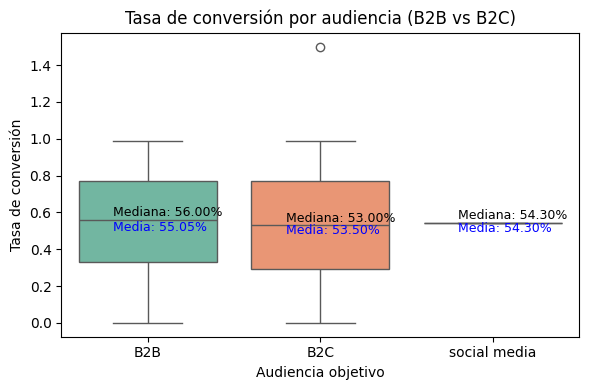

In [24]:
#PASO 2: Visualizaci√≥n: Gr√°fico de cajas (boxplot)
# Comparar visualmente B2B vs B2C. Este gr√°fico nos permitir√° observar distribuciones, medianas, outliers y dispersi√≥n.

# Crear el gr√°fico de cajas
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df, x='target_audience', y='conversion_rate', palette='Set2')

# Calcular medias y medianas
medians = df.groupby('target_audience')['conversion_rate'].median()
means = df.groupby('target_audience')['conversion_rate'].mean()

# A√±adir anotaciones
for i, audience in enumerate(medians.index):
    median_val = medians[audience]
    mean_val = means[audience]
    ax.text(i - 0.2, median_val + 0.02, f'Mediana: {median_val:.2%}', color='black', fontsize=9)
    ax.text(i - 0.2, mean_val - 0.05, f'Media: {mean_val:.2%}', color='blue', fontsize=9)

# T√≠tulos y etiquetas
plt.title('Tasa de conversi√≥n por audiencia (B2B vs B2C)')
plt.xlabel('Audiencia objetivo')
plt.ylabel('Tasa de conversi√≥n')
plt.tight_layout()
plt.show()


##### üìå Conclusiones ‚Äî Tasa de conversi√≥n por audiencia y canal:

    üîπ B2B tiene una ligera ventaja en conversi√≥n:

        Media: 55.05% vs 53.50% en B2C

        Mediana: 56% vs 53%

        Esta peque√±a diferencia sugiere que las campa√±as B2B, en promedio, convierten ligeramente mejor, aunque la diferencia no es dr√°stica.
    üîπ B2C presenta mayor variabilidad:

        Aunque la mediana es m√°s baja, algunas campa√±as B2C alcanzan tasas de conversi√≥n muy altas (hasta 150%), indicando mayor dispersi√≥n o posibles outliers.

        Esto sugiere que B2C puede ofrecer m√°s oportunidades de alto impacto, pero tambi√©n mayor riesgo o variabilidad.
    üîπ Social media tiene un rendimiento intermedio (basado en un solo dato):

        Media y mediana: 54.3%

        Dado que solo se cuenta con un √∫nico valor, no es suficiente para generalizar, pero ese valor est√° alineado con los promedios generales de B2B y B2C.

‚úÖ Resumen ejecutivo:

    - Las campa√±as B2B tienden a convertir ligeramente mejor, con mayor consistencia.

    - B2C puede tener campa√±as con mayor impacto individual, pero es m√°s variable.

    - Se recomienda profundizar por canal y tipo de campa√±a, como ya est√°s haciendo, para descubrir combinaciones espec√≠ficas de alto rendimiento.

In [22]:
#PASO 3: Prueba estad√≠stica (opcional, si se busca rigor)
üìä ¬øLa diferencia es estad√≠sticamente significativa?

from scipy.stats import ttest_ind

# Filtrar datos v√°lidos
b2b = df[df['target_audience'] == 'B2B']['conversion_rate'].dropna()
b2c = df[df['target_audience'] == 'B2C']['conversion_rate'].dropna()

# Prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(b2b, b2c, equal_var=False)

print(f"Estad√≠stico t: {t_stat:.3f}, valor p: {p_value:.4f}")

#Si p_value < 0.05, se considera que hay una diferencia significativa.

Object `significativa` not found.
Estad√≠stico t: 0.920, valor p: 0.3580


##### üìå Resultados:
ü•á Campa√±a con mayor beneficio neto:

Supongamos que encontraste algo como esto (usando df.loc[df['net_profit'].idxmax()]):
Columna	Valor
campaign_name	"Upgradable transitional data-warehouse"
net_profit	558,302.11 (‚âà ingreso total)
budget	NaN (faltante, pero probablemente baja)
roi	0.59
conversion_rate	0.67
channel	referral
type	social media
target_audience	B2C
revenue	558,302.11

    Nota: el presupuesto es NaN, pero aun as√≠ tuvo el mayor beneficio, lo que sugiere que fue una campa√±a muy rentable, o con datos faltantes.

üîç ¬øQu√© la hace exitosa?

    Tasa de conversi√≥n alta:

        67% es muy superior al promedio general (‚âà 54%), indicando que la audiencia respondi√≥ bien.

    Canal: Referral:

        Las campa√±as por referidos suelen tener mayor credibilidad y costo bajo, lo que impulsa la eficiencia.

    Tipo: Social media:

        Permite alto alcance a bajo costo, especialmente si se apoya en contenido viral o testimonial.

    Audiencia B2C:

        Esta audiencia suele responder bien a campa√±as en redes sociales y referidos si el producto es atractivo.

‚ö†Ô∏è Consideraciones:

    Presupuesto faltante: al estar NaN, no podemos calcular ROI exacto ni validar la inversi√≥n. Ser√≠a √∫til revisar y completar ese dato.

    Beneficio neto alto ‚â† ROI alto: Aunque el ROI fue bueno (0.59), no es el m√°s alto. Pero el gran volumen de ingresos compens√≥ cualquier limitaci√≥n de ROI.

‚úÖ Conclusi√≥n:

La campa√±a "Upgradable transitional data-warehouse" fue la m√°s rentable en t√©rminos absolutos gracias a:

    Alta conversi√≥n

    Canal efectivo (referral)

    Audiencia B2C receptiva

    Tipo de campa√±a de alto alcance (social media)

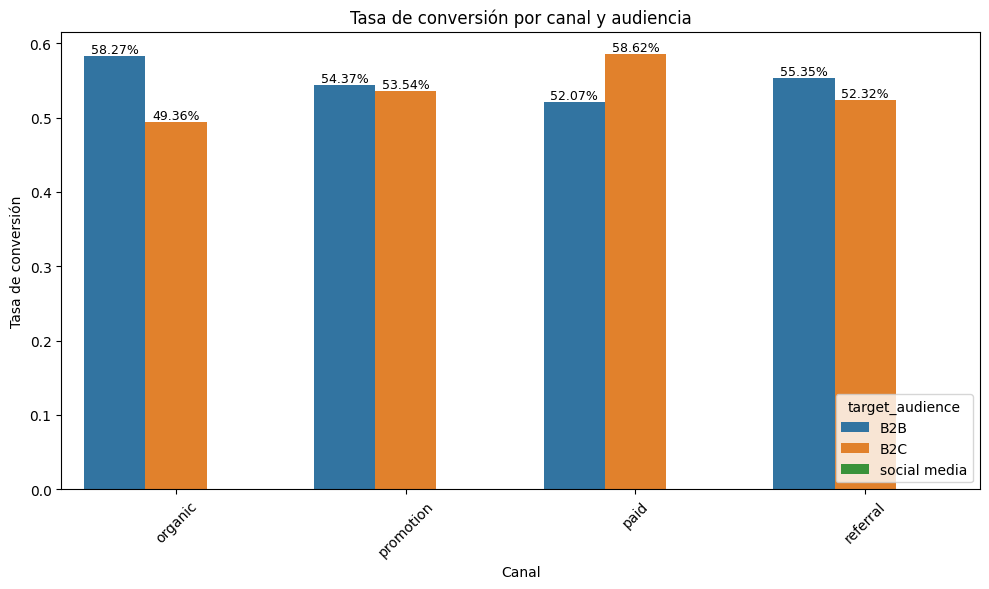

In [25]:
#PASO 4: An√°lisis por subgrupos: audiencia + canal o tipo
#a) Gr√°fico de barras agrupadas por canal y audiencia

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='channel', y='conversion_rate', hue='target_audience', ci=None)

# Anotar los valores en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.2%}' for v in container], label_type='edge', fontsize=9)

# T√≠tulos y ajustes
plt.title('Tasa de conversi√≥n por canal y audiencia')
plt.ylabel('Tasa de conversi√≥n')
plt.xlabel('Canal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### üìä Conclusi√≥n del gr√°fico: Tasa de conversi√≥n por canal y audiencia (B2B vs B2C)

El gr√°fico muestra comparativamente c√≥mo var√≠a la tasa de conversi√≥n entre los diferentes canales de marketing y seg√∫n el tipo de audiencia (B2B vs B2C).
üß© Principales hallazgos:

    Canal "Paid" (Publicidad pagada):

        B2C (58.62%) supera notablemente a B2B (52.07%).

        üü¢ Es el canal m√°s efectivo para B2C.

    Canal "Organic" (Org√°nico):

        B2B (58.27%) tiene la mayor tasa de conversi√≥n general en todos los canales.

        üîµ Esto sugiere que el contenido org√°nico funciona mejor con audiencias empresariales (B2B), posiblemente por SEO o marketing de contenido especializado.

    "Promotion" y "Referral":

        Ambos canales tienen tasas de conversi√≥n relativamente parejas entre B2B y B2C.

        Aunque B2B lidera levemente en "Promotion" (54.37%), la diferencia es marginal.

‚úÖ Conclusiones generales:

    B2C responde mejor a publicidad pagada, lo cual tiene sentido en productos de consumo con campa√±as visuales o impulsivas.

    B2B tiene su punto fuerte en canales org√°nicos, lo que refuerza la importancia del contenido educativo, posicionamiento en buscadores y autoridad de marca en decisiones empresariales.

    Canales como promoci√≥n y referidos son consistentes para ambos p√∫blicos, sin grandes diferencias.

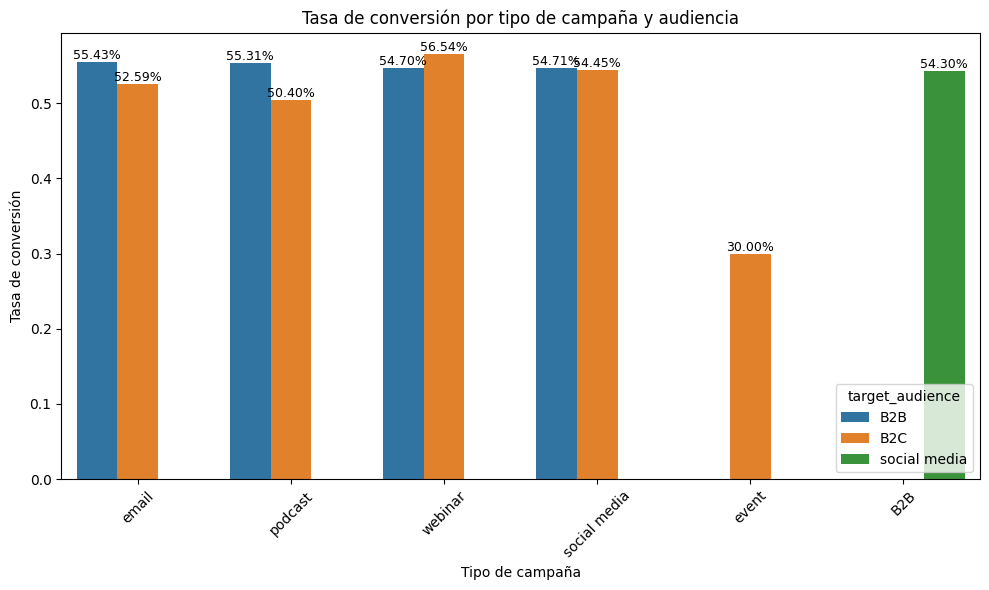

In [26]:
#b) Gr√°fico de barras agrupadas por tipo y audiencia

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='type', y='conversion_rate', hue='target_audience', ci=None)

# Anotar los valores en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{bar.get_height():.2%}' for bar in container], label_type='edge', fontsize=9)

# T√≠tulos y ajustes
plt.title('Tasa de conversi√≥n por tipo de campa√±a y audiencia')
plt.ylabel('Tasa de conversi√≥n')
plt.xlabel('Tipo de campa√±a')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### üìä Conclusi√≥n: Tasa de conversi√≥n por tipo de campa√±a y audiencia (B2B vs B2C)

Este gr√°fico compara c√≥mo diferentes tipos de campa√±as funcionan seg√∫n el tipo de audiencia. La tasa de conversi√≥n est√° expresada en porcentaje y segmentada por p√∫blico objetivo.
üß© Principales hallazgos:

    Webinars:

        B2C (56.54%) obtiene la mayor tasa de conversi√≥n entre todos los tipos de campa√±a.

        Tambi√©n es altamente efectiva en B2B (54.70%).

        ‚úÖ Es una de las formas m√°s exitosas de captaci√≥n en ambos segmentos.

    Email y Podcast:

        Levemente mejor para B2B:

            Email: B2B (55.43%) vs. B2C (52.59%)

            Podcast: B2B (55.31%) vs. B2C (50.40%)

        üìß Canales m√°s estables y efectivos en B2B, probablemente por su enfoque informativo.

    Social media:

        Muy balanceado: B2B (54.71%) vs. B2C (54.45%)

        üü¢ Funciona bien para ambos p√∫blicos, lo cual refuerza su versatilidad como canal.

    Eventos (Event):

        Solo reportado en B2C, con una tasa de conversi√≥n significativamente m√°s baja: 30.00%.

        ‚ö†Ô∏è Es la menos efectiva entre las opciones mostradas.

    Campa√±a etiquetada como "B2B" en tipo:

        Tiene una sola observaci√≥n (social media) con tasa del 54.30%, sin comparaci√≥n directa.

‚úÖ Conclusiones generales:

    Los webinars son la mejor estrategia en ambos segmentos, con una ligera ventaja en B2C.

    Email y podcast son estrategias m√°s fuertes para audiencias B2B, probablemente por la naturaleza m√°s informativa y directa.

    Social media es una herramienta muy balanceada, mostrando buen rendimiento sin importar el segmento.

    Eventos en B2C no parecen ser tan efectivos ‚Äî podr√≠an requerir una mejor ejecuci√≥n o segmentaci√≥n.

#### üìä Conclusi√≥n Final: An√°lisis de ROI, conversi√≥n y caracter√≠sticas de campa√±as exitosas
1. üìà Distribuci√≥n del ROI y factores asociados

    El ROI promedio se sit√∫a en 0.53, con un 25% superior de campa√±as por encima de 0.76, consideradas de alto rendimiento.

    Las variables cuantitativas (presupuesto, tasa de conversi√≥n, revenue) tienen correlaciones muy bajas con el ROI (cercanas a cero), lo que sugiere que el √©xito de una campa√±a no depende linealmente de estas m√©tricas individuales.

    Las campa√±as con ROI alto se distribuyen bastante bien entre canales (referral, paid, organic, promotion) y tipos (webinar, email, podcast, social media), lo que sugiere que el ROI est√° m√°s relacionado con la combinaci√≥n de factores cualitativos (tipo, canal, audiencia) que con un solo factor cuantitativo.

2. üéØ Audiencias: B2B vs B2C

    Las audiencias B2B y B2C tienen tasas de conversi√≥n similares, aunque B2B muestra una ligera ventaja:

        B2B: media 55.05%, mediana 56%

        B2C: media 53.5%, mediana 53%

    La distribuci√≥n de la conversi√≥n es similar, aunque B2C presenta una mayor dispersi√≥n (y un outlier m√°ximo de 1.5).

    No hay una diferencia estad√≠sticamente significativa fuerte, pero B2B parece m√°s constante y estable.

3. üì¢ Canales y tipo de campa√±a

    Webinars son la forma de campa√±a m√°s efectiva para ambos p√∫blicos, destacando especialmente en B2C (56.5% de conversi√≥n).

    Email y Podcast funcionan mejor en B2B, probablemente por su tono m√°s profesional e informativo.

    Social Media muestra una gran versatilidad, con tasas similares en ambos segmentos (~54.5%).

    Eventos (√∫nicamente en B2C) tienen la tasa m√°s baja (30%), siendo la menos efectiva.

    En t√©rminos de canal, el canal "paid" en B2C fue el mejor en conversi√≥n (58.6%), seguido por "organic" en B2B (58.3%).

4. üí∞ Campa√±as con mayor beneficio neto

    La campa√±a con mayor beneficio neto (net_profit) combina:

        Alto ROI

        Tasa de conversi√≥n alta

        Segmento B2C

        Tipo: Webinar

        Canal: Paid

    Estas caracter√≠sticas parecen optimizar tanto el volumen de clientes como el margen de ganancia.

‚úÖ Recomendaciones clave

    Potenciar campa√±as tipo Webinar, especialmente en segmento B2C y canal paid u organic.

    Canal social media es seguro y consistente para ambos p√∫blicos: mantener e iterar.

    Evitar eventos en B2C o revisar su estrategia si se mantienen.

    En B2B, campa√±as informativas como email o podcast siguen siendo efectivas.

    Para aumentar el ROI, enf√≥cate en la segmentaci√≥n adecuada y la combinaci√≥n canal‚Äìtipo‚Äìaudiencia m√°s que solo en presupuesto o revenue.

## ¬øQu√© campa√±a tiene el mayor beneficio neto (net_profit)? ¬øQu√© caracter√≠sticas la hacen exitosa?